### Tutorial for how to use hooks to visualize output feature maps or look at intermediate gradients
Adapted from PyTorch official tutorials  

In [16]:
import torch
import torchvision.utils as vutils
from torchvision import transforms
import torchvision.models as models

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
vgg = models.vgg16(pretrained=True).to(device)
res50_model = models.resnet50(pretrained=True).to(device)

In [3]:
def to_tensor(img):
    transformations = transforms.Compose([transforms.Resize((224,224)),
                                  transforms.ToTensor()])
    img = transformations(img)
    img = img.unsqueeze(0)
    return img

In [4]:
img = Image.open('cat.jpg')
img_tensor = to_tensor(img).to(device)
print(img_tensor.shape)

torch.Size([1, 3, 224, 224])


In [5]:
# define a register function 
outputs= []
def hook(module, input, output):    
    outputs.append(output)

In [6]:
# Look at the output and decide where you want to hook
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [21]:
# define a register function to grab outputs from the forward pass starting from where we hooked (I think)
outputs= []

def hook(module, input, output):    
    outputs.append(output)
vgg.features[1].register_forward_hook(hook)
out = vgg(img_tensor)

In [26]:
print("Grabbed %d feature maps objects" % len(outputs))
for idx, o in enumerate(outputs):
    print('outputs[%d] has %d feature maps of shape %d x %d' %(idx, o.shape[1], o.shape[2],o.shape[3]))

Grabbed 6 feature maps objects
outputs[0] has 64 feature maps of shape 224 x 224
outputs[1] has 256 feature maps of shape 56 x 56
outputs[2] has 256 feature maps of shape 56 x 56
outputs[3] has 256 feature maps of shape 56 x 56
outputs[4] has 256 feature maps of shape 56 x 56
outputs[5] has 256 feature maps of shape 56 x 56


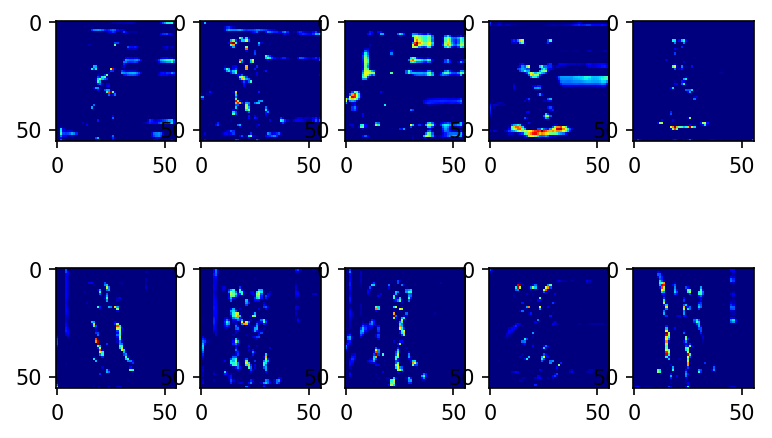

In [34]:
# Visualize some features from outputs that were hooked

x = outputs[1].detach()
grid_img = vutils.make_grid(x, nrow=8)
grid_img = grid_img.permute(1,2,0)

plt.figure(dpi=150)
for i in range(1, 11):
    plt.subplot(2, 5, i) 
    plt.imshow(grid_img[:,:,i], cmap = 'jet') 


#### References

[1] http://web.cs.ucdavis.edu/~yjlee/teaching/ecs289g-winter2018/Pytorch_Tutorial.pdf   
[2] https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html